In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from itk import binaryarray_outline

In [2]:
plt.style.reload_library()
plt.style.use(['science', 'high-vis'])
COLOR_SCHEME = ['#2402ba','#b400e0','#98c1d9','#ff0000','#292800','#ff9b71']

In [3]:
A_arr = np.array([0.4, 0.5, 0.6 , 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4])
zeta_arr = np.array([0.001, 0.005, 0.01, 0.02, 0.04, 0.07, 0.08, 0.1, 0.125, 0.15, 0.175, 0.2, 0.225, 0.25, 0.275, 0.3])

In [4]:
mask_ReducedChi2 = np.random.randint(0,2, (len(A_arr),len(zeta_arr)))==1
mask_ReducedChi2[0,0] = mask_ReducedChi2[0,-1] = mask_ReducedChi2[-1,0] = mask_ReducedChi2[-1,-1] = True

In [27]:
mask_ReducedChi2 = np.zeros( (len(A_arr),len(zeta_arr)) )
mask_ReducedChi2[2:5,3:5]=1
mask_ReducedChi2[5:15,1:7]=1
mask_ReducedChi2[3:6,5:9]=1
mask_ReducedChi2[5,-1]=1
mask_ReducedChi2[-1,5]=1
mask_ReducedChi2[0,5]=1

mask_ReducedChi2 = np.array(mask_ReducedChi2, dtype=np.bool)

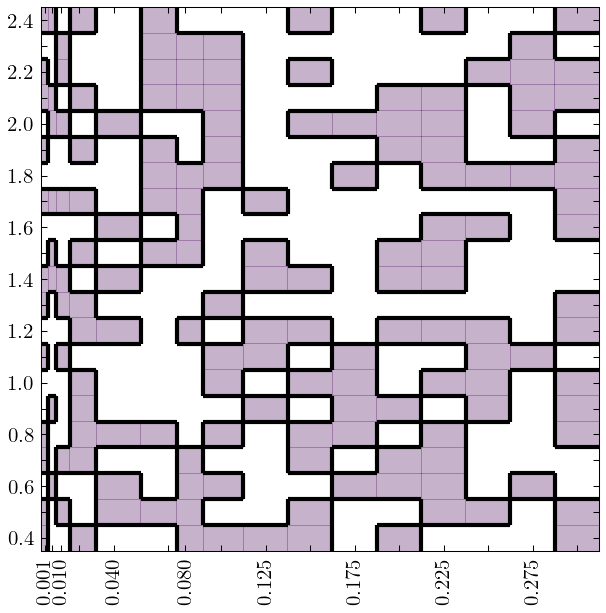

In [6]:
plt.figure(dpi=150)
ax = plt.gca()
mask_ReducedChi2_marr = np.ma.masked_equal(mask_ReducedChi2, False)
# ax.pcolor(zeta_arr, A_arr, mask_ReducedChi2_marr, shading='nearest', cmap='binary', hatch='////')
plt.pcolormesh(zeta_arr, A_arr, mask_ReducedChi2_marr, shading='nearest', alpha=0.3)
plt.xticks(zeta_arr,rotation='vertical');
plt.yticks(A_arr);
# plt.grid()
plt.tick_params(which='minor', length=0)

# https://stackoverflow.com/questions/20337664/cleanest-way-to-hide-every-nth-tick-label-in-matplotlib-colorbar
[l.set_visible(False) for (i,l) in enumerate(ax.xaxis.get_ticklabels()) if i % 2 != 0]
[l.set_visible(False) for (i,l) in enumerate(ax.yaxis.get_ticklabels()) if i % 2 != 0]

line_segments = LineCollection(binaryarray_outline(mask_ReducedChi2, zeta_arr, A_arr), linewidths=2, colors='k', alpha=1)
ax.add_collection(line_segments)